**Семинар 3**  
План занятия:
- разбор класса Value (сторим собственный autograd)
- обучение параметров полинома
- построение MLP модели на основе класса Value
- теоретический блок по визуализации обучения (wandb)
- обучение собственной MLP модели

#Разбор класса Value

# Oбучение полинома

In [ ]:
import numpy as np
import math
import random

xx = np.linspace(-math.pi, math.pi, 2000)
yy = np.sin(xx).tolist()

In [ ]:
a = Value(random.uniform(-1,1))
b = Value(random.uniform(-1,1))
c = Value(random.uniform(-1,1))
d = Value(random.uniform(-1,1))
parameters = [a, b, c, d]

In [ ]:
pseudo_sin = ...

In [ ]:
import sys
print(sys.getrecursionlimit())

5000


In [ ]:
sys.setrecursionlimit(5000)

In [ ]:
#%%wandb

for step in range(2000):
  polynom = ...

  loss = ...

  #wandb.log({'loss': loss.data})

  if step % 10 == 0:
      print(f"{step} step - loss {loss}")

  #set grad to zero
  ...
  
  #call backward
  ...

  #update weights
  ...

print(f'Result: y = {a.data} + {b.data} x + {c.data} x^2 + {d.data} x^3')

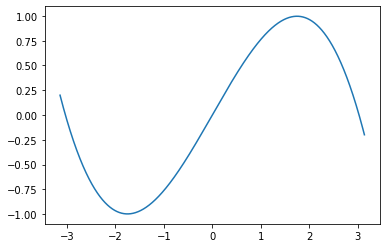

In [ ]:
plt.plot(xx, [y.data for y in list(map(pseudo_sin, xx))])

#Построение MLP модели на основе класса Value

In [ ]:
import random

class Module:

    def zero_grad(self):
        ...

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin, nonlin=True):
        self.w = ...
        self.b = ...
        self.nonlin = nonlin

    def __call__(self, x):
        act = ...
        return ...

    def parameters(self):
        return ...

    def __repr__(self):
        return f"{'ReLU' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.neurons = ...

    def __call__(self, x):
        out = ...
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return ...

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):

    def __init__(self, nin, nouts):
        sz = ...
        self.layers = [Layer(sz[i], sz[i+1], nonlin=(i!=len(nouts)-1)) for i in range(len(nouts))]
        
    def __call__(self, x):
        ...
        return x

    def parameters(self):
        return ...

    def __repr__(self):
        repr = '\n'.join(str(layer) for layer in self.layers)
        return f"MLP of [{repr}]"

# Визуализация обучения

https://docs.wandb.ai/guides/integrations/pytorch

https://docs.wandb.ai/ref/python/watch  

https://docs.wandb.ai/guides/track/jupyter

In [ ]:
!pip install wandb

In [ ]:
!wandb login

In [ ]:
import wandb
run = wandb.init(project="polynom_learning_")

In [ ]:
run.finish()

# Обучение собственной модели MLP

In [ ]:
np.random.seed(1337)
random.seed(1337)

In [ ]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)]
Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)]
Layer of [LinearNeuron(16)]]
number of parameters 337


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

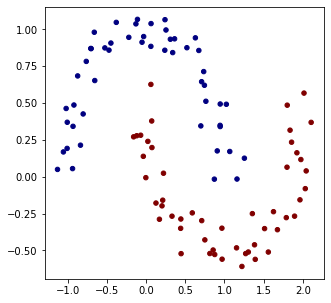

In [ ]:
# make up a dataset

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1) # [n x 2], [n,]
y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [ ]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
  
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = ...
    
    # svm "max-margin" loss
    # https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html
    # https://en.wikipedia.org/wiki/Hinge_loss
    losses = ...
    data_loss = sum(losses)/len(losses)
    # L2 regularization
    alpha = 1e-4
    reg_loss = ...
    
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8742178866699549, grad=0) 0.54


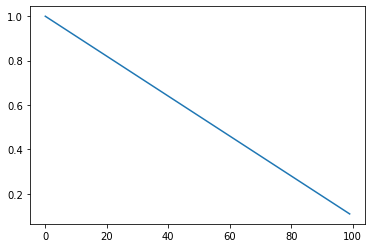

In [ ]:
#draw learning rate
learning_rate = lambda k: 1.0 - 0.9*k/100
x = list(range(100))
plt.plot(x, list(map(learning_rate, x)))

In [ ]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    learning_rate = ...
    # backward (zero_grad + backward)
    ...
    # update (sgd)
    for p in model.parameters():
      ...
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 34 loss 0.01917769152367769, accuracy 100.0%
step 35 loss 0.019684119623731382, accuracy 100.0%
step 36 loss 0.021326141038309505, accuracy 100.0%


KeyboardInterrupt: ignored

(-1.60880919956848, 1.89119080043152)

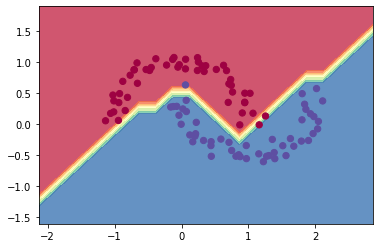

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())